In [39]:
# testing
import numpy as np
import importlib
import CI_Lindblad
importlib.reload(CI_Lindblad)
from matplotlib import pyplot as plt
from CI_Lindblad import CI_Lindblad


In [ ]:

N = 6
solver = CI_Lindblad(Nx = N, Ny = N, alpha = 1.0)
G0 = solver.G_CI()
print(solver.real_space_chern_number(G0))

Class CI_Lindblad has been Initialized
0.9817841552088206


In [49]:
Ggain = solver.Lgain(G0, n_a=1).reshape(2*N**2, 2*N**2)
Gloss = solver.Lloss(G0, n_a=0.5).reshape(2*N**2, 2*N**2)
Gdecoh = solver.Ldecoh(G0, n_a=0.5).reshape(2*N**2, 2*N**2)

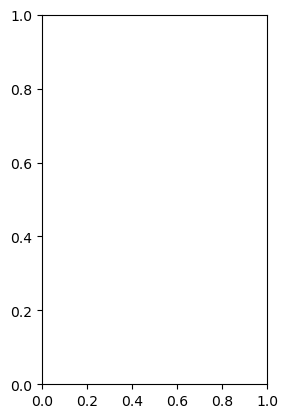

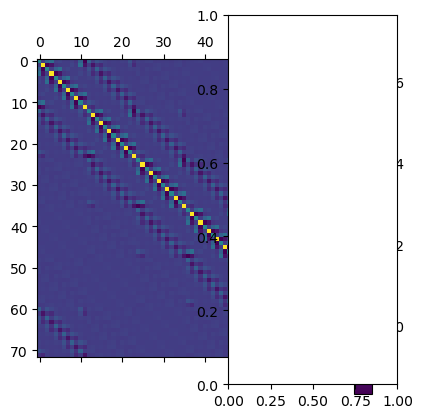

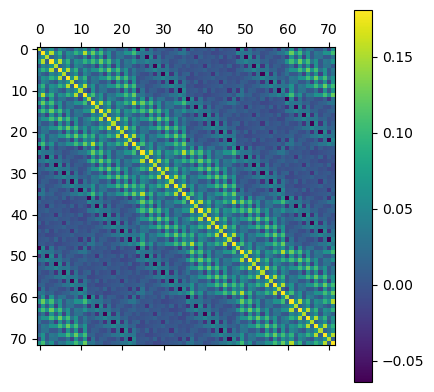

In [51]:
plt.subplot(1,2,1)
plt.matshow(G0.reshape(2*N**2, 2*N**2).real)
plt.colorbar()

plt.subplot(1,2,2)
plt.matshow(Ggain.real)
plt.colorbar()




In [6]:

# 4) Auto-find saturation step for alpha=1
step_idx, t_final, ch_val, G_sat = solver.find_saturation_timestep(G_init=G0)
print(t_final)

KeyboardInterrupt: 